# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

Neftalí Valdez

<a href="http://twitter.com/neftalivldz" target="_blank">@neftalivldz</a> | <a href="mailto:nvaldez@tec.mx">nvaldez@tec.mx</a>


# Importar librerías

In [30]:
#!pip3 install pandas_datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 1.0 MB/s eta 0:00:00 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 6.4 MB/s eta 0:00:006.6 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for lxml: filename=lxml-4.9.2-cp38-cp38-macosx_11_0_arm64.whl size=1607955 sha256=04bd739836c04135252202b786337edb7da2e9b2f2ed67d49b3d5b12b688cf51
  Stored in directory: /Users/neftalivaldez/Library/Caches/pip/wheels/48/8f/1c/8ba0114d2c6805668b1ef55ecb0b4a0a1c111a1fc8cd8a511a
Successfully built lxml


In [1]:
import eikon as ek  # the Eikon Python wrapper package
import numpy as np  # NumPy
import pandas as pd  # pandas
import cufflinks as cf  # Cufflinks
import configparser as cp
cf.set_config_file(offline=True)  # set the plotting mode to offline

# Se valida el 'environment'

In [2]:
import sys
print(sys.prefix)

/opt/homebrew/Caskroom/miniforge/base/envs/mlp


# Se inicia la conexión a refinitiv mediante eikon 

In [4]:
cfg = cp.ConfigParser()
cfg.read('../refinitiv.cfg')
ek.set_app_key(cfg['eikon']['app_id'])

# Extracción de datos

In [5]:
dji = ek.get_data('0#.DJI', fields=['TR.CommonName', 'TR.PriceClose',
                                      'TR.Volume', 'TR.TotalReturnYTD'])[0]

In [6]:
dji

,Instrument,Company Common Name,Price Close,Volume,YTD Total Return
0,GS.N,Goldman Sachs Group Inc,318.53,831779,-6.567072
1,NKE.N,Nike Inc,117.81,1679697,0.966755
2,CSCO.OQ,Cisco Systems Inc,50.54,4990287,6.935128
3,JPM.N,JPMorgan Chase & Co,128.49,4448528,-3.475528
4,DIS.N,Walt Disney Co,95.62,1585345,10.059853
5,INTC.OQ,Intel Corp,29.18,10363607,11.809436
6,DOW.N,Dow Inc,52.0,1195707,4.462609
7,MRK.N,Merck & Co Inc,106.93,2544449,-2.965546
8,CVX.N,Chevron Corp,157.65,1748080,-11.383082
9,AXP.N,American Express Co,163.12,882848,10.794768


In [7]:
dji.set_index('Instrument')['YTD Total Return'].sort_values().iplot(kind='bar', color='blue')

# Efficient frontier in Python Ch 5 Jansen
https://github.com/stefan-jansen/machine-learning-for-trading/blob/main/05_strategy_evaluation/04_mean_variance_optimization.ipynb

# Imports & Settings

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
%matplotlib inline

import pandas as pd
import numpy as np
from numpy.random import random, uniform, dirichlet, choice
from numpy.linalg import inv

from scipy.optimize import minimize

import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import math

In [11]:
sns.set_style('whitegrid')
np.random.seed(42)

In [12]:
cmap = sns.diverging_palette(10, 240, n=9, as_cmap=True)

# Prepare Data

In [13]:
from datetime import datetime, timedelta
end = datetime.today()
start = end - timedelta(days=(365.2*10))
print(start, end)

2013-03-27 23:34:55.461814 2023-03-27 23:34:55.461814


In [14]:
const = dji['Instrument'].tolist()
const_limp = [i for i in const if i != '']
const

['GS.N',
 'NKE.N',
 'CSCO.OQ',
 'JPM.N',
 'DIS.N',
 'INTC.OQ',
 'DOW.N',
 'MRK.N',
 'CVX.N',
 'AXP.N',
 'VZ.N',
 'HD.N',
 'WBA.OQ',
 'MCD.N',
 'UNH.N',
 'KO.N',
 'JNJ.N',
 'MSFT.OQ',
 'HON.OQ',
 'CRM.N',
 'PG.N',
 'IBM.N',
 'MMM.N',
 'AAPL.OQ',
 'WMT.N',
 'CAT.N',
 'AMGN.OQ',
 'V.N',
 'TRV.N',
 'BA.N']

In [15]:
df = ek.get_timeseries(const_limp, start_date = start, end_date = end, fields='CLOSE', interval="weekly")
df.count()

CLOSE
GS.N       100
NKE.N      100
CSCO.OQ    100
JPM.N      100
DIS.N      100
INTC.OQ    100
DOW.N      100
MRK.N      100
CVX.N      100
AXP.N      100
VZ.N       100
HD.N       100
WBA.OQ     100
MCD.N      100
UNH.N      100
KO.N       100
JNJ.N      100
MSFT.OQ    100
HON.OQ     100
CRM.N      100
PG.N       100
IBM.N      100
MMM.N      100
AAPL.OQ    100
WMT.N      100
CAT.N      100
AMGN.OQ    100
V.N        100
TRV.N      100
BA.N       100
dtype: int64

In [16]:
df = ek.get_timeseries(const_limp[0], start_date = start, end_date = end, fields='CLOSE', interval="weekly")
df[const_limp[0]] = np.log(df['CLOSE'].div(df['CLOSE'].shift(1)))
weekly_returns = df.drop('CLOSE', 1).iloc[1:]
weekly_returns

GS.N,GS.N
Date,
2013-04-05,-0.023794
2013-04-12,0.037093
2013-04-19,-0.072294
2013-04-26,0.038119
2013-05-03,0.008705
...,...
2023-02-24,-0.012699
2023-03-03,-0.018754
2023-03-10,-0.085981


In [17]:
semanas = weekly_returns.shape[0]

In [18]:
for i in const_limp[1:]:
    w = ek.get_timeseries(i, start_date = start, end_date = end, fields='CLOSE', interval="weekly")
    w[i] = np.log(w['CLOSE'].div(w['CLOSE'].shift(1)))
    w1 = w.drop('CLOSE', 1).iloc[1:]
    p = round(w1.count()[0])
    print(i, p)
    if p == semanas:    
        weekly_returns = weekly_returns.join(w1, lsuffix="_left", rsuffix="_right")

NKE.N 521
CSCO.OQ 521
JPM.N 521
DIS.N 521
INTC.OQ 521
DOW.N 209
MRK.N 521
CVX.N 521
AXP.N 521
VZ.N 521
HD.N 521
WBA.OQ 521
MCD.N 521
UNH.N 521
KO.N 521
JNJ.N 521
MSFT.OQ 521
HON.OQ 521
CRM.N 521
PG.N 521
IBM.N 521
MMM.N 521
AAPL.OQ 521
WMT.N 521
CAT.N 521
AMGN.OQ 521
V.N 521
TRV.N 521
BA.N 521


In [19]:
weekly_returns

,GS.N,NKE.N,CSCO.OQ,JPM.N,DIS.N,INTC.OQ,MRK.N,CVX.N,AXP.N,VZ.N,...,PG.N,IBM.N,MMM.N,AAPL.OQ,WMT.N,CAT.N,AMGN.OQ,V.N,TRV.N,BA.N
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-05,-0.023794,-0.000678,-0.014451,0.009437,0.015721,-0.04254,0.020144,-0.011001,-0.032543,0.008307,...,0.015069,-0.018406,-0.004998,-0.04496,0.020633,-0.027629,0.014815,-0.027942,0.00261,0.003721
2013-04-12,0.037093,0.026936,0.044135,0.0227,0.048212,0.034729,0.042938,0.020383,0.005802,0.025893,...,0.023373,0.009363,0.017802,0.015546,0.028011,0.005305,0.069877,0.003566,0.02168,0.031078
2013-04-19,-0.072294,0.005597,-0.051929,-0.036995,0.016543,0.034455,0.008034,-0.034264,0.023474,0.026963,...,0.016718,-0.106633,-0.018464,-0.095892,-0.003443,-0.055852,-0.001704,-0.010858,-0.016953,-0.010517
2013-04-26,0.038119,0.015797,0.0107,0.034339,0.005023,0.041891,0.00797,0.035097,0.007556,0.026069,...,-0.05464,0.022431,-0.01833,0.065922,0.009534,0.051492,-0.027304,0.019748,0.004001,0.054103
2013-05-03,0.008705,0.042082,0.007711,-0.027166,0.04627,0.02365,-0.047047,0.028335,0.035951,-0.017873,...,0.014038,0.051162,0.038186,0.075853,0.002653,0.026799,-0.017686,0.071028,0.003049,0.00954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24,-0.012699,-0.056009,-0.046154,-0.009252,-0.047888,-0.093718,0.003373,-0.002706,-0.017352,-0.037492,...,-0.005371,-0.033513,-0.047022,-0.039035,-0.027484,-0.04803,-0.028978,-0.0181,-0.002264,-0.065957
2023-03-03,-0.018754,0.024271,0.016367,0.019186,0.00834,0.048904,-0.027773,0.015579,0.027397,-0.012468,...,0.012063,-0.007148,0.031592,0.029021,-0.012715,0.077927,0.00491,0.019039,-0.009433,0.082125
2023-03-10,-0.085981,-0.028941,-0.014718,-0.072225,-0.077796,0.030588,0.00755,-0.032594,-0.07771,-0.042173,...,-0.027038,-0.032854,-0.066902,-0.016894,-0.026655,-0.117484,-0.030001,-0.034692,-0.044041,-0.057599


In [20]:
weekly_returns.shape
#weekly_returns.info()
#weekly_returns

(521, 29)

# Set Parameters

In [21]:
stocks = weekly_returns.columns

In [22]:
n_obs, n_assets = weekly_returns.shape
n_assets, n_obs

(29, 521)

In [23]:
weekly_returns.shape

(521, 29)

In [24]:
NUM_PF = 100000 # no of portfolios to simulate

In [25]:
x0 = uniform(0, 1, n_assets)
x0 /= np.sum(np.abs(x0))

# Annualization Factor

In [26]:
periods_per_year = round(weekly_returns.resample('A').size().mean())
periods_per_year

47

# Compute Mean Returns, Covariance and Precision Matrix

In [27]:
mean_returns = weekly_returns.mean()
cov_matrix = weekly_returns.cov()
#cov_matrix

In [28]:
precision_matrix = pd.DataFrame(inv(cov_matrix), index=stocks, columns=stocks)
#precision_matrix

# Risk-Free Rate
Load historical 10-year Treasury rate:

In [33]:
treasury_10yr_monthly = (web.DataReader('DGS10', 'fred', start, end)
                         .resample('M')
                         .last()
                         .div(periods_per_year)
                         .div(100)
                         .squeeze())

In [34]:
treasury_10yr_monthly

DATE
2013-03-31    0.000398
2013-04-30    0.000362
2013-05-31    0.000460
2013-06-30    0.000536
2013-07-31    0.000553
                ...   
2022-11-30    0.000783
2022-12-31    0.000826
2023-01-31    0.000749
2023-02-28    0.000834
2023-03-31    0.000719
Freq: M, Name: DGS10, Length: 121, dtype: float64

In [35]:
rf_rate = 0.0008044297520661157

# Simulate Random Portfolios
The simulation generates random weights using the Dirichlet distribution, and computes the mean, standard deviation, and SR for each sample portfolio using the historical return data:

In [36]:
def simulate_portfolios(mean_ret, cov, rf_rate=rf_rate, short=True):
    alpha = np.full(shape=n_assets, fill_value=.05)
    weights = dirichlet(alpha=alpha, size=NUM_PF)
    if short:
        weights *= choice([-1, 1], size=weights.shape)

    returns = weights @ mean_ret.values + 1
    returns = returns ** periods_per_year - 1
    std = (weights @ weekly_returns.T).std(1)
    std *= np.sqrt(periods_per_year)
    sharpe = (returns - rf_rate) / std
    return pd.DataFrame({'Annualized Standard Deviation': std,
                         'Annualized Returns': returns,
                         'Sharpe Ratio': sharpe}), weights

In [37]:
simul_perf, simul_wt = simulate_portfolios(mean_returns, cov_matrix, short=False)

In [38]:
df = pd.DataFrame(simul_wt)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,...,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,3.387729e-02,3.484978e-02,3.490189e-02,3.476186e-02,3.466794e-02,3.489124e-02,3.428877e-02,3.409471e-02,3.426403e-02,3.470016e-02,...,3.444711e-02,3.475450e-02,3.431916e-02,3.425506e-02,3.422715e-02,3.452077e-02,3.432335e-02,3.398972e-02,3.423956e-02,3.452791e-02
std,1.146174e-01,1.175665e-01,1.170813e-01,1.169901e-01,1.171230e-01,1.182028e-01,1.161237e-01,1.160049e-01,1.159790e-01,1.173051e-01,...,1.165072e-01,1.174967e-01,1.155440e-01,1.163114e-01,1.161036e-01,1.163010e-01,1.163206e-01,1.156337e-01,1.159937e-01,1.173578e-01
min,3.449525e-97,1.468984e-126,2.914390e-105,3.804325e-110,6.529360e-117,3.249848e-103,2.430600e-118,1.061115e-129,7.177718e-103,4.696520e-101,...,2.357753e-108,1.467701e-98,2.664126e-96,1.048431e-103,2.342653e-112,7.101902e-94,6.134030e-107,1.331377e-102,4.702377e-100,1.525747e-123
25%,4.958895e-13,6.052184e-13,6.566509e-13,5.830046e-13,5.414612e-13,4.806880e-13,4.434690e-13,5.453091e-13,5.287690e-13,6.019780e-13,...,6.107819e-13,4.846268e-13,5.080114e-13,5.505956e-13,5.412374e-13,5.861518e-13,4.219099e-13,5.466173e-13,5.645029e-13,5.069329e-13
50%,5.546551e-07,5.636609e-07,6.332352e-07,5.946972e-07,5.818660e-07,4.961631e-07,5.619719e-07,5.429508e-07,5.488652e-07,6.713012e-07,...,5.686394e-07,5.705885e-07,5.618044e-07,5.589914e-07,5.361217e-07,6.398455e-07,5.466298e-07,5.642432e-07,5.865449e-07,5.385602e-07
75%,1.862444e-03,1.899997e-03,1.941222e-03,1.895035e-03,1.912575e-03,1.818597e-03,1.877606e-03,1.862272e-03,1.952644e-03,1.938218e-03,...,1.878731e-03,1.934220e-03,1.935948e-03,1.862997e-03,1.833287e-03,2.037068e-03,1.992939e-03,1.883655e-03,1.935050e-03,1.873771e-03
max,9.976161e-01,9.993427e-01,9.968282e-01,9.905341e-01,9.942291e-01,9.941357e-01,9.979773e-01,9.985487e-01,9.976897e-01,9.989522e-01,...,9.933508e-01,9.965030e-01,9.966086e-01,9.990449e-01,9.979837e-01,9.965327e-01,9.982567e-01,9.990786e-01,9.980781e-01,9.967999e-01


# Plot Simulated Portfolios

Max Sharpe: 19.25%, 21.83%


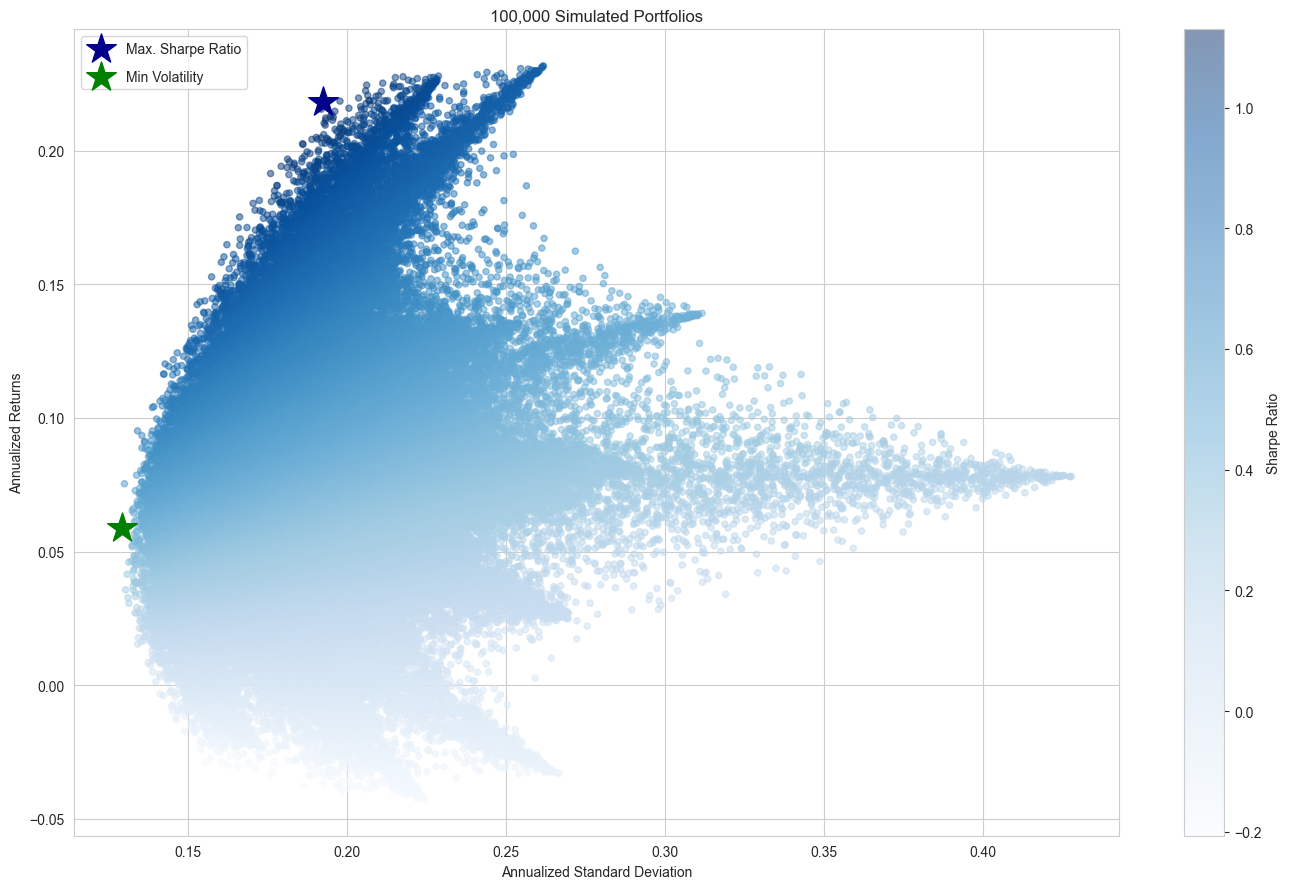

In [39]:
ax = simul_perf.plot.scatter(x=0, y=1, c=2, cmap='Blues',
                             alpha=0.5, figsize=(14, 9), colorbar=True,
                             title=f'{NUM_PF:,d} Simulated Portfolios')

max_sharpe_idx = simul_perf.iloc[:, 2].idxmax()
sd, r = simul_perf.iloc[max_sharpe_idx, :2].values
print(f'Max Sharpe: {sd:.2%}, {r:.2%}')
ax.scatter(sd, r, marker='*', color='darkblue', s=500, label='Max. Sharpe Ratio')

min_vol_idx = simul_perf.iloc[:, 0].idxmin()
sd, r = simul_perf.iloc[min_vol_idx, :2].values
ax.scatter(sd, r, marker='*', color='green', s=500, label='Min Volatility')
plt.legend(labelspacing=1, loc='upper left')
plt.tight_layout()

# Compute Annualize PF Performance
Now we'll set up the quadratic optimization problem to solve for the minimum standard deviation for a given return or the maximum SR.

To this end, define the functions that measure the key metrics:

In [40]:
def portfolio_std(wt, rt=None, cov=None):
    """Annualized PF standard deviation"""
    return np.sqrt(wt @ cov @ wt * periods_per_year)

In [41]:
def portfolio_returns(wt, rt=None, cov=None):
    """Annualized PF returns"""
    return (wt @ rt + 1) ** periods_per_year - 1

In [42]:
def portfolio_performance(wt, rt, cov):
    """Annualized PF returns & standard deviation"""
    r = portfolio_returns(wt, rt=rt)
    sd = portfolio_std(wt, cov=cov)
    return r, sd

# Max Sharpe PF
Define a target function that represents the negative SR for scipy's minimize function to optimize, given the constraints that the weights are bounded by [-1, 1], if short trading is permitted, and [0, 1] otherwise, and sum to one in absolute terms.

In [43]:
def neg_sharpe_ratio(weights, mean_ret, cov):
    r, sd = portfolio_performance(weights, mean_ret, cov)
    return -(r - rf_rate) / sd

In [44]:
weight_constraint = {'type': 'eq', 
                     'fun': lambda x: np.sum(np.abs(x))-1}

In [45]:
def max_sharpe_ratio(mean_ret, cov, short=False):
    return minimize(fun=neg_sharpe_ratio,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=((-1 if short else 0, 1),) * n_assets,
                    constraints=weight_constraint,
                    options={'tol':1e-10, 'maxiter':1e4})

# Compute Efficient Frontier
The solution requires iterating over ranges of acceptable values to identify optimal risk-return combinations

In [46]:
def min_vol_target(mean_ret, cov, target, short=False):

    def ret_(wt):
        return portfolio_returns(wt, mean_ret)

    constraints = [{'type': 'eq',
                    'fun': lambda x: ret_(x) - target},
                   weight_constraint]

    bounds = ((-1 if short else 0, 1),) * n_assets
    return minimize(portfolio_std,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=bounds,
                    constraints=constraints,
                    options={'tol': 1e-10, 'maxiter': 1e4})

# Min Volatility Portfolio

In [47]:
def min_vol(mean_ret, cov, short=False):
    bounds = ((-1 if short else 0, 1),) * n_assets

    return minimize(fun=portfolio_std,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=bounds,
                    constraints=weight_constraint,
                    options={'tol': 1e-10, 'maxiter': 1e4})

In [48]:
def efficient_frontier(mean_ret, cov, ret_range, short=False):
    return [min_vol_target(mean_ret, cov, ret) for ret in ret_range]

# Run Calculation
## Get random PF

In [49]:
simul_perf, simul_wt = simulate_portfolios(mean_returns, cov_matrix, short=False)

In [50]:
print(simul_perf.describe())

       Annualized Standard Deviation  Annualized Returns   Sharpe Ratio
count                  100000.000000       100000.000000  100000.000000
mean                        0.193874            0.079949       0.413312
std                         0.035556            0.043437       0.220158
min                         0.128266           -0.042479      -0.206932
25%                         0.169287            0.054575       0.276353
50%                         0.188872            0.077444       0.402861
75%                         0.210053            0.102440       0.541022
max                         0.428274            0.231403       1.132695


In [51]:
simul_max_sharpe = simul_perf.iloc[:, 2].idxmax()
simul_perf.iloc[simul_max_sharpe]

Annualized Standard Deviation    0.189189
Annualized Returns               0.215098
Sharpe Ratio                     1.132695
Name: 42291, dtype: float64

# Get Max Sharpe PF

In [52]:
max_sharpe_pf = max_sharpe_ratio(mean_returns, cov_matrix, short=False)
max_sharpe_perf = portfolio_performance(max_sharpe_pf.x, mean_returns, cov_matrix)

In [53]:
r, sd = max_sharpe_perf
pd.Series({'ret': r, 'sd': sd, 'sr': (r-rf_rate)/sd})

ret    0.221264
sd     0.191647
sr     1.150340
dtype: float64

# Get Min Vol PF

In [54]:
min_vol_pf = min_vol(mean_returns, cov_matrix, short=False)
min_vol_perf = portfolio_performance(min_vol_pf.x, mean_returns, cov_matrix)

In [55]:
ret_range = np.linspace(simul_perf.iloc[:, 1].min(), simul_perf.iloc[:, 1].max(), 50)
eff_pf = efficient_frontier(mean_returns, cov_matrix, ret_range, short=True)
eff_pf = pd.Series(dict(zip([p['fun'] for p in eff_pf], ret_range)))

# Plot Result

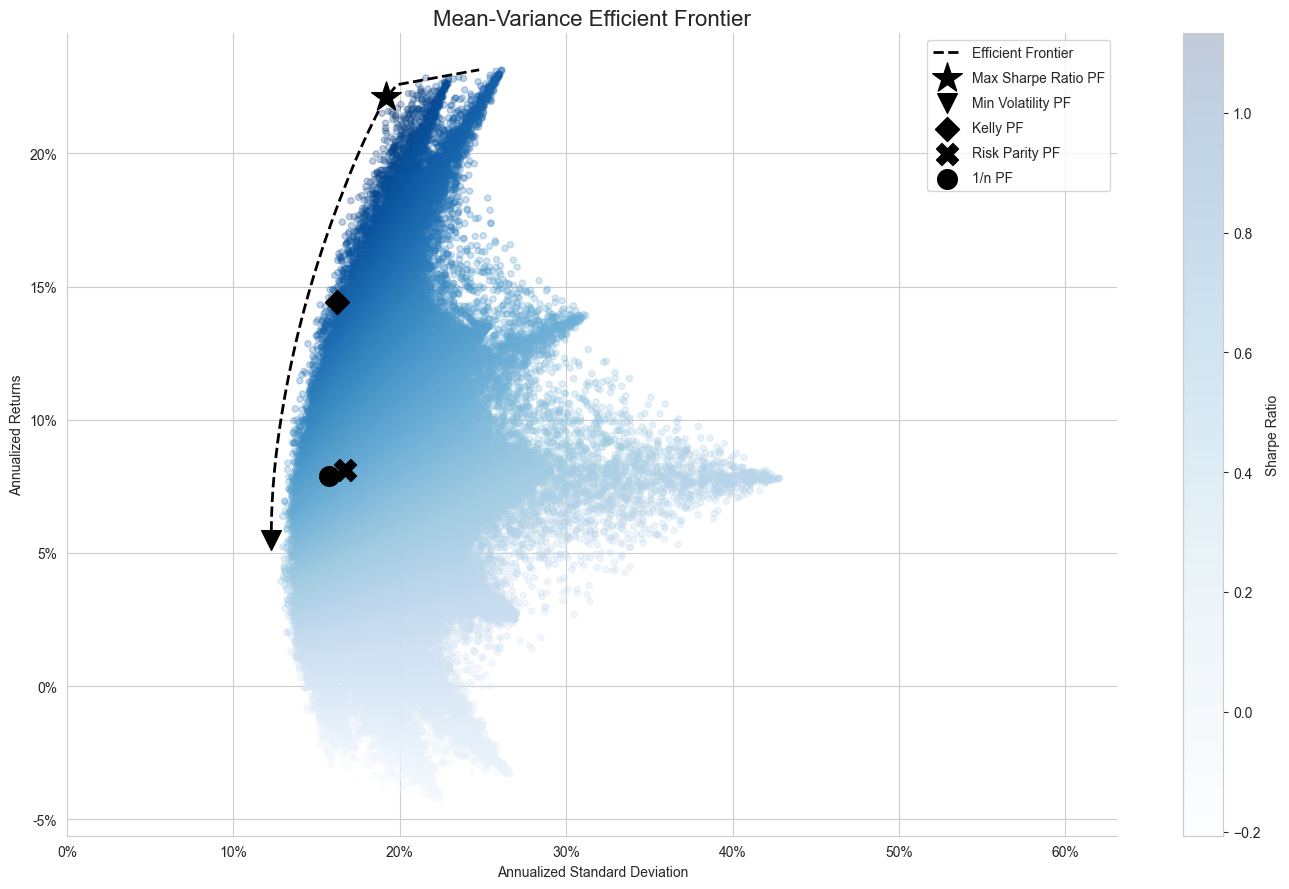

In [56]:
fig, ax = plt.subplots()
simul_perf.plot.scatter(x=0, y=1, c=2, ax=ax, cmap='Blues',alpha=0.25, 
                        figsize=(14, 9), colorbar=True)

eff_pf[eff_pf.index.min():].plot(linestyle='--', lw=2, ax=ax, c='k',
                                 label='Efficient Frontier')

r, sd = max_sharpe_perf
ax.scatter(sd, r, marker='*', color='k', s=500, label='Max Sharpe Ratio PF')

r, sd = min_vol_perf
ax.scatter(sd, r, marker='v', color='k', s=200, label='Min Volatility PF')

kelly_wt = precision_matrix.dot(mean_returns).clip(lower=0).values
kelly_wt /= np.sum(np.abs(kelly_wt))
r, sd = portfolio_performance(kelly_wt, mean_returns, cov_matrix)
ax.scatter(sd, r, marker='D', color='k', s=150, label='Kelly PF')

std = weekly_returns.std()
std /= std.sum()
r, sd = portfolio_performance(std, mean_returns, cov_matrix)
ax.scatter(sd, r, marker='X', color='k', s=250, label='Risk Parity PF')

r, sd = portfolio_performance(np.full(n_assets, 1/n_assets), mean_returns, cov_matrix)
ax.scatter(sd, r, marker='o', color='k', s=200, label='1/n PF')


ax.legend(labelspacing=0.8)
ax.set_xlim(0, eff_pf.max()+.4)
ax.set_title('Mean-Variance Efficient Frontier', fontsize=16)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
sns.despine()
fig.tight_layout();

In [ ]:
kelly_wt = precision_matrix.dot(mean_returns).clip(lower=0).values
kelly_wt /= np.sum(np.abs(kelly_wt))
r, sd = portfolio_performance(kelly_wt, mean_returns, cov_matrix)

In [70]:
kelly_wt

array([0.        , 0.02875169, 0.01196327, 0.11742146, 0.        ,
       0.        , 0.05512624, 0.        , 0.        , 0.        ,
       0.0050971 , 0.        , 0.06610175, 0.140353  , 0.        ,
       0.00072159, 0.11792019, 0.03474547, 0.        , 0.04551572,
       0.        , 0.        , 0.07743047, 0.        , 0.10180783,
       0.        , 0.17466252, 0.01691123, 0.00547046])

In [71]:
r, sd = portfolio_performance(kelly_wt, mean_returns, cov_matrix)

In [72]:
print(r, sd)

0.1441163547732287 0.1620576105734589


In [58]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 902.9 kB/s eta 0:00:000:00:01m eta 0:00:01


In [59]:
simul_perf.to_excel("output.xlsx")

In [69]:
simul_wt[42991]

array([5.95346151e-02, 5.17836628e-07, 5.96837494e-01, 1.26409598e-01,
       1.45984461e-04, 2.71112211e-08, 2.05098000e-09, 7.96754695e-11,
       2.46954376e-06, 8.46172972e-03, 7.55884378e-05, 3.01014991e-22,
       4.20322360e-07, 8.73159898e-13, 2.43892882e-03, 7.56499644e-02,
       6.08282548e-15, 1.30162438e-01, 4.11168252e-17, 3.65696022e-07,
       1.02099747e-25, 1.22052713e-20, 1.89938657e-08, 7.76689399e-05,
       2.00493213e-04, 8.48200012e-12, 1.11294169e-33, 1.87632670e-09,
       1.67348935e-06])

In [61]:
eff_pf

0.218509   -0.042479
0.175740   -0.036890
0.155765   -0.031301
0.150002   -0.025711
0.145626   -0.020122
0.141916   -0.014532
0.138605   -0.008943
0.135673   -0.003353
0.133098    0.002236
0.130862    0.007826
0.128896    0.013415
0.127204    0.019004
0.125792    0.024594
0.124660    0.030183
0.123791    0.035773
0.123184    0.041362
0.122837    0.046952
0.122713    0.052541
0.122722    0.058131
0.122890    0.063720
0.123259    0.069309
0.123820    0.074899
0.124572    0.080488
0.125497    0.086078
0.126584    0.091667
0.127826    0.097257
0.129217    0.102846
0.130749    0.108436
0.132415    0.114025
0.134207    0.119615
0.136120    0.125204
0.138163    0.130793
0.140366    0.136383
0.142716    0.141972
0.145206    0.147562
0.147826    0.153151
0.150586    0.158741
0.153478    0.164330
0.156504    0.169920
0.159678    0.175509
0.162988    0.181098
0.166425    0.186688
0.169978    0.192277
0.173668    0.197867
0.177571    0.203456
0.181736    0.209046
0.186139    0.214635
0.190761    0

In [62]:
simul_perf.where(Annualized Returns)

SyntaxError: invalid syntax (2449097417.py, line 1)

In [63]:
# making boolean series for a team name
#filter1 = simul_perf["Annualized Standard Deviation"]==0.16830
  
# making boolean series for age
filter1 = simul_perf["Annualized Returns"]>=0.10
filter2 = simul_perf["Annualized Returns"]<=0.15


  
# filtering data on basis of both filters
simul_perf.where(filter1 & filter2, inplace = True)

In [67]:
simul_perf.columns

Index(['Annualized Standard Deviation', 'Annualized Returns', 'Sharpe Ratio'], dtype='object')

In [68]:
!pwd

/Users/neftalivaldez/app/tec-finanzas-2023
